## Import Packages and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tabulate import tabulate

df = pd.read_csv("iris-2.csv")
df.head()

C:\Users\zhatz\AppData\Local\Temp\ipykernel_1620\2277536346.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1. Data Analysis

### Part A

In [26]:
classes = ["All"] + list(df["species"].unique())
features = df.columns[:-1]
feature_colors = [
    "\033[36msepal_length\033[0m",
    "\033[36msepal_width\033[0m",
    "\033[36mpetal_length\033[0m",
    "\033[36mpetal_width\033[0m",
]
stats_test = [
    "\033[32mMinimum\033[0m",
    "\033[32mMaximum\033[0m",
    "\033[32mMean\033[0m",
    "\033[32mTrimmed Mean\033[0m",
    "\033[32mAlpha Trimmed Mean\033[0m",
    "\033[32mStandard Deviation\033[0m",
    "\033[32mSkewness\033[0m",
    "\033[32mKurtosis\033[0m",
]

stats_dict = {}

for c1, i in enumerate(classes):
    stats_matrix = np.zeros((8,4))
    for c2, j in enumerate(features):
        if i != "All":
            feature_class = df.loc[df["species"]==i, j]
        else:
            feature_class = df.loc[:, j]
        stats_matrix[0, c2] = min(feature_class)
        stats_matrix[1, c2] = max(feature_class)
        stats_matrix[2, c2] = feature_class.mean()
        stats_matrix[3, c2] = stats.trim_mean(feature_class, 0.1)
        stats_matrix[4, c2] = stats.mstats.trimmed_mean(feature_class)
        stats_matrix[5, c2] = feature_class.std()
        stats_matrix[6, c2] = stats.skew(feature_class)
        stats_matrix[7, c2] = stats.kurtosis(feature_class)
    df_stats = pd.DataFrame(stats_matrix, columns=feature_colors, index=stats_test)
    stats_dict[i] = df_stats

In [29]:
for key, value in stats_dict.items():
    print(f"\033[1m\033[31m Species: \033[0m{key}")
    print(tabulate(value, headers='keys', tablefmt='rounded_outline'))
    print("")

 Species: All
╭────────────────────┬────────────────┬───────────────┬────────────────┬───────────────╮
│                    │   sepal_length │   sepal_width │   petal_length │   petal_width │
├────────────────────┼────────────────┼───────────────┼────────────────┼───────────────┤
│ Minimum            │       4.3      │      2        │       1        │      0.1      │
│ Maximum            │       7.9      │      4.4      │       6.9      │      2.5      │
│ Mean               │       5.84333  │      3.054    │       3.75867  │      1.19867  │
│ Trimmed Mean       │       5.80833  │      3.03917  │       3.76083  │      1.18417  │
│ Alpha Trimmed Mean │       5.80833  │      3.03917  │       3.76083  │      1.18417  │
│ Standard Deviation │       0.828066 │      0.433594 │       1.76442  │      0.763161 │
│ Skewness           │       0.311753 │      0.330703 │      -0.271712 │     -0.103944 │
│ Kurtosis           │      -0.573568 │      0.241443 │      -1.39536  │     -1.33525  │
╰──────

### Part B

Analysis of the statistic description data...

## 2. Data Processing

### Part A

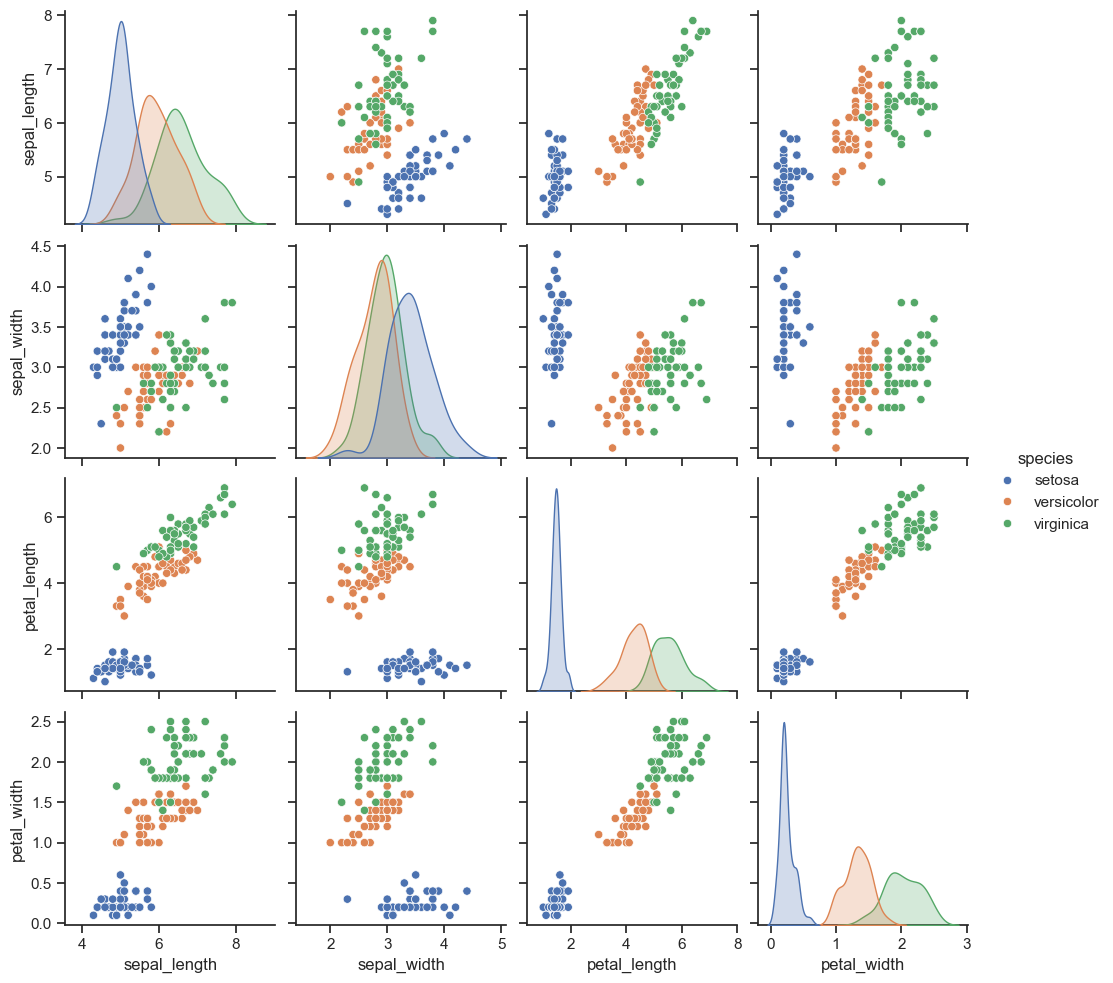

In [43]:
## Type code here for the part 1 ##
sns.set_theme(style="ticks")
sns.pairplot(df, hue="species")

### Part B

#### i.

In [ ]:
"""
For each feature in the Iris dataset:
    MergeSort(feature_values)

MergeSort(A):
    if the number of elements in A <= 1:
        return A
    else:
        middle = length of A / 2
        left = A[0..middle-1]
        right = A[middle..end]
        
        MergeSort(left)
        MergeSort(right)
        
        Merge(left, right, A)

Merge(left, right, A):
    i = 0, j = 0, k = 0
    
    while i < length of left and j < length of right:
        if left[i] <= right[j]:
            A[k] = left[i]
            i += 1
        else:
            A[k] = right[j]
            j += 1
        k += 1
    
    while i < length of left:
        A[k] = left[i]
        i += 1
        k += 1
    
    while j < length of right:
        A[k] = right[j]
        j += 1
        k += 1
"""

#### ii.

The running time of the algorithm I presented called merge sort would be O(n log n) for each feature we want to sort. N would be the number of samples that need to be sorted.

The total running time will be dependent on many different factors such as the constants hidden in the big O notation, the implmentation of the algorithm and the hardware that the sorting algorithm is run on. We can estimate the total running time below in terms of constant values where:
- c is a constant representing the time taken for the basic operations in the merge step.
- d represents the fixed overhead time for setting up the algorithm, which is often negligible.

### T(n)=4⋅c⋅n⋅log(n)+d

#### iii.

In [ ]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2  # Finding the mid of the array
        L = arr[:mid]  # Dividing the array elements into 2 halves
        R = arr[mid:]

        merge_sort(L)  # Sorting the first half
        merge_sort(R)  # Sorting the second half

        i = j = k = 0

        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        # Checking if any element was left
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

#### iv.

Based on the graphical analysis in part A, it seems like the combination of petal_width and petal_length can separate the three plant species. There is slight overlap between versicolor and virginica but it is very minimal.

#### v

- A

The features that can separate the plant species are petal_length and petal_width. This separation can be seen in the pairplot from part A.

- B

The metric used to determine the feature that can separate classes would be the class separation metric...

### Part C

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_iris_data = scaler.fit_transform(df.iloc[:,:4])
iris_scaled = pd.DataFrame(data=scaled_iris_data, columns=scaler.get_feature_names_out())
iris_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [55]:
for col in iris_scaled:
    print(f"Feature: {col}")
    print(f"Min Value: {min(iris_scaled[col])}")
    print(f"Max Value: {max(iris_scaled[col])}")
    print("")

Feature: sepal_length
Min Value: 0.0
Max Value: 1.0

Feature: sepal_width
Min Value: 0.0
Max Value: 1.0

Feature: petal_length
Min Value: 0.0
Max Value: 1.0

Feature: petal_width
Min Value: 0.0
Max Value: 1.0



### Part D

hint: mahalanobis distance most likely

In [119]:
from itertools import combinations
import scipy.stats as stats

class mahalanobis_distance:
    
    def __init__(self, data: np.ndarray):
        self.data = data

    # Calculate the covariance matrix using previous assignment code
    def cov_matrix(self):
        row, col = self.data.shape
        cov_mat = np.zeros([col, col])

        for i in range(col):
            i_mean = np.mean(self.data[:,i])
            for j in range(col):
                j_mean = np.mean(self.data[:,j])
                cov_mat[i,j] = np.sum((self.data[:,i] - i_mean) * (self.data[:,j] - j_mean)) / (row - 1)
        return cov_mat

    def mahalanobis(self, y: np.ndarray):
        diff = y - self.data.mean(axis=0)
        covariance = self.cov_matrix()
        cov_inv = np.linalg.inv(covariance)
        left = np.dot(diff, cov_inv)
        mahalanobis_dist = np.sqrt(np.dot(left, diff.T))
        return mahalanobis_dist

    def remove_outliers(self, distances: np.ndarray, alpha: float = 0.05):
        # Degrees of freedom equals the number of features
        degrees_of_freedom = self.data.shape[1]
        # Critical value from chi-squared distribution
        threshold = stats.chi2.ppf((1 - alpha), df=degrees_of_freedom)
        outliers = distances > np.sqrt(threshold)
        return outliers

distance_list = []
for i in df["species"].unique():
    data = df.loc[df["species"]==i,scaler.get_feature_names_out()].values
    outlier = mahalanobis_distance(data=data)
    for row in data:
        distance_list.append(outlier.mahalanobis(row))

# print("50 Distances for Setosa Class")
# print(np.array(distance_list))
outliers_list = ~outlier.remove_outliers(distance_list, alpha=0.1)
print(outliers_list)
data_without_outliers = df.loc[np.array(outliers_list),:]


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True False  True
 False  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True False  True False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True False  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True False  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True False False  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True]


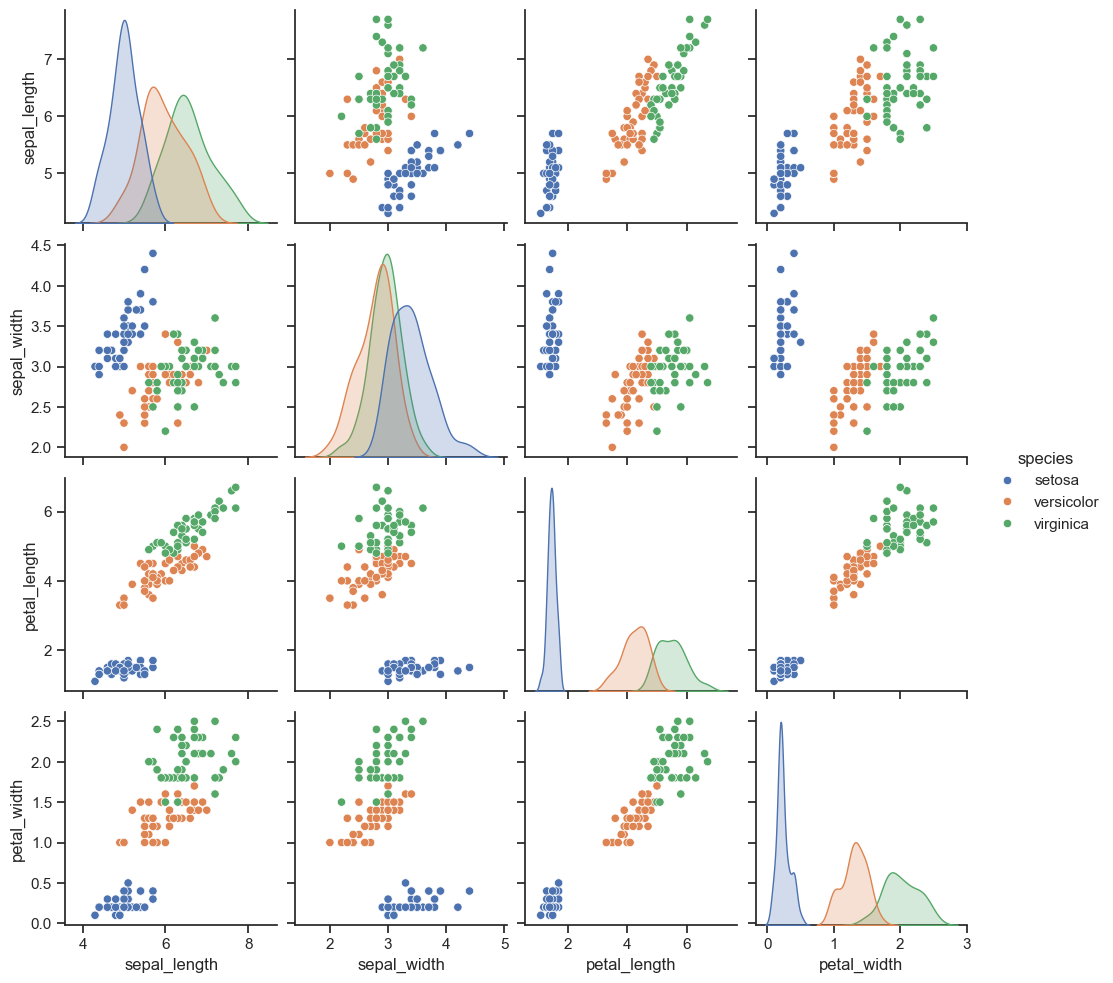

In [120]:
## Type code here for the part 1 ##
sns.set_theme(style="ticks")
sns.pairplot(data_without_outliers, hue="species")

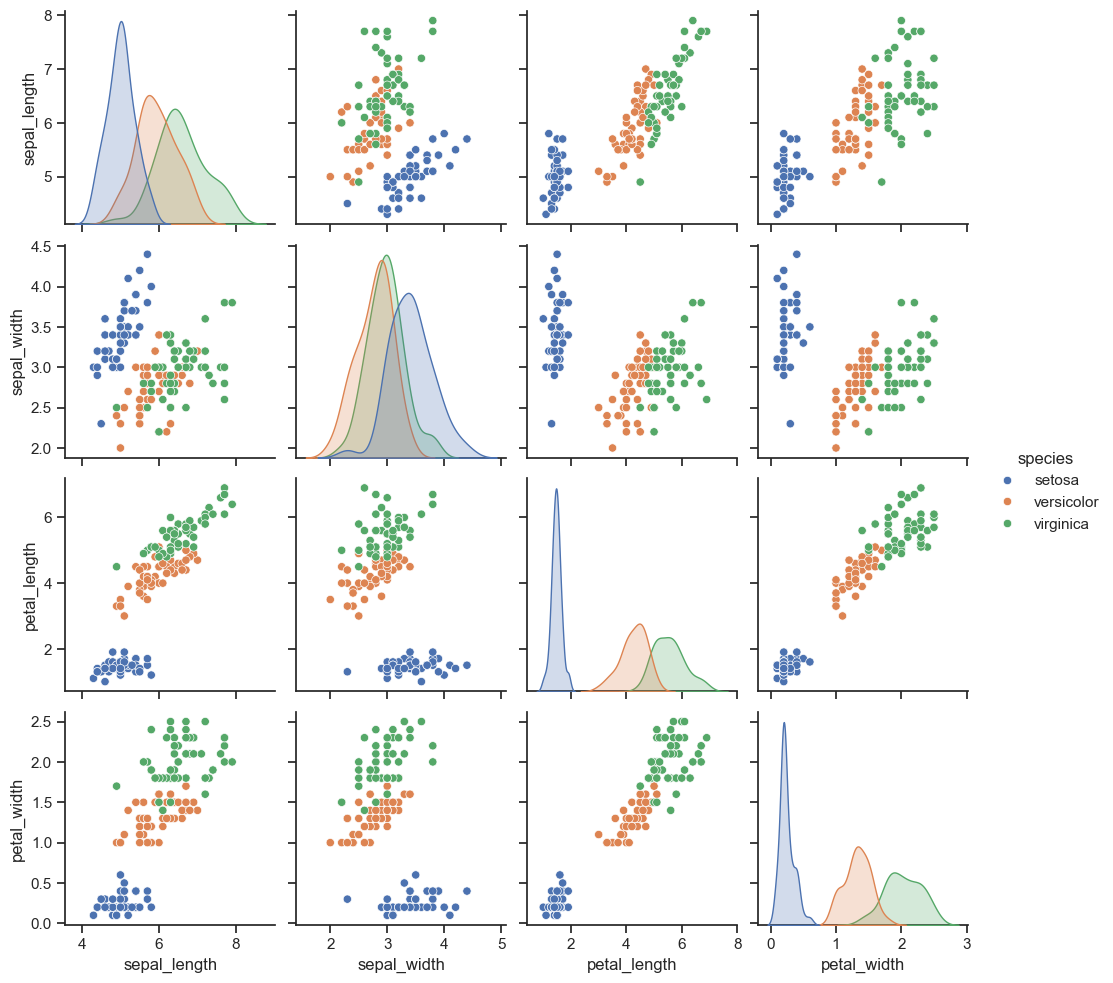

In [105]:
## Type code here for the part 1 ##
sns.set_theme(style="ticks")
sns.pairplot(df, hue="species")